In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# trainデータを読み込む

In [444]:
df_train = pd.read_csv('train.csv')
df_train.head()

,ID,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,3401,Bachelors,2018,Bangalore,3,41,Male,No,4,1
1,1463,Bachelors,2012,Bangalore,3,27,Male,No,5,0
2,4644,Bachelors,2013,Bangalore,3,31,Female,No,5,0
3,3303,Bachelors,2016,Bangalore,1,39,Male,No,2,0
4,1260,Bachelors,2014,Pune,3,26,Male,No,4,0


In [445]:
df_train.describe()

,ID,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,2304.608929,2015.065000,2.695357,29.339286,2.881429,0.347143
std,1333.527970,1.867165,0.567407,4.775027,1.555756,0.476147
min,2.000000,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,1151.500000,2014.000000,3.000000,26.000000,2.000000,0.000000
50%,2279.000000,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,3436.250000,2017.000000,3.000000,32.000000,4.000000,1.000000
max,4652.000000,2018.000000,3.000000,41.000000,7.000000,1.000000


In [446]:
print(df_train.dtypes)

ID                            int64
Education                    object
JoiningYear                   int64
City                         object
PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
dtype: object


In [447]:
print(df_train['City'].unique())
print(df_train['Education'].unique())
print(df_train['Gender'].unique())

['Bangalore' 'Pune' 'New Delhi']
['Bachelors' 'Masters' 'PHD']
['Male' 'Female']


# グラフで調べる

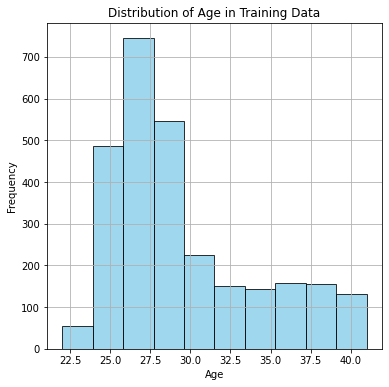

In [421]:
#やっぱり20年代の人の方がやめる
plt.figure(figsize=(6,6))
plt.hist(df_train['Age'], edgecolor='black', color='skyblue', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in Training Data')
plt.grid(True)

plt.show()

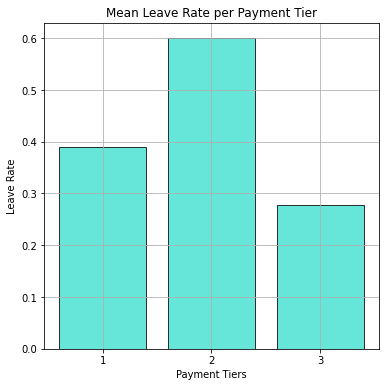

In [422]:
#高い報酬＝やめにくい、１より２がやめやすい…中途半端だから？
mean_leave_per_payment_tier = df_train.groupby(['PaymentTier'])['LeaveOrNot'].mean()
cities = [str(tier) for tier in mean_leave_per_payment_tier.index.to_list()]

plt.figure(figsize=(6,6))
plt.bar(cities, mean_leave_per_payment_tier, 
        edgecolor='black', color='turquoise', alpha=0.8)
plt.xlabel('Payment Tiers')
plt.ylabel('Leave Rate')
plt.title('Mean Leave Rate per Payment Tier')
plt.grid(True)

plt.show()

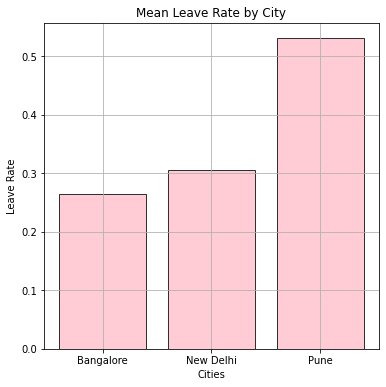

In [423]:
#Cityってそこまで関係ある？
mean_leave_by_city = df_train.groupby(['City'])['LeaveOrNot'].mean()
cities = [str(tier) for tier in mean_leave_by_city.index.to_list()]

plt.figure(figsize=(6,6))
plt.bar(cities, mean_leave_by_city, 
        edgecolor='black', color='pink', alpha=0.8)
plt.xlabel('Cities')
plt.ylabel('Leave Rate')
plt.title('Mean Leave Rate by City')
plt.grid(True)

plt.show()

# 前処理

In [424]:
#2018年がmaxの値になっているので、これは2019年のデータと仮定。会社でどれくらい長く勤めているか知りたいです。

#df_train['YearsInCompany'] = 2019 - df_train['JoiningYear']
#df_train = df_train.drop(columns = ['JoiningYear', 'ID'])

#結局諦めました。モデルの予測が悪化したし、そもそも年度の値そのまま使えます。年数にしなくても。
df_train.head()

,ID,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,3401,Bachelors,2018,Bangalore,3,41,Male,No,4,1
1,1463,Bachelors,2012,Bangalore,3,27,Male,No,5,0
2,4644,Bachelors,2013,Bangalore,3,31,Female,No,5,0
3,3303,Bachelors,2016,Bangalore,1,39,Male,No,2,0
4,1260,Bachelors,2014,Pune,3,26,Male,No,4,0


## Encoding: OneHotEncoder

In [425]:
#最初、df_trainを読み込んだときに、index_column=0に設定したが、それでOneHotEncoderがおかしくなりました。
#OrdinalEncoderで試していたら原因がわかって、結局OneHotEncoderで実行することにしました。
#OrdinalEncoderは一番下にあります。

L=["Education", "City", "Gender", "EverBenched"]

encoder = OneHotEncoder(sparse_output=False, drop="first")
encoder.fit(df_train[L].values)
e = encoder.transform(df_train[L].values)

print(e)

labels = encoder.get_feature_names_out(L)
print(labels)
df_train[labels] = pd.DataFrame(e)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]]
['Education_Masters' 'Education_PHD' 'City_New Delhi' 'City_Pune'
 'Gender_Male' 'EverBenched_Yes']


In [426]:
df_train = df_train.drop(columns=['Education', 'City', 'Gender', 'EverBenched'])

In [427]:
a = df_train.pop('LeaveOrNot')
df_train['LeaveOrNot'] = a

In [428]:
df_train.head()

,ID,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes,LeaveOrNot
0,3401,2018,3,41,4,0.0,0.0,0.0,0.0,1.0,0.0,1
1,1463,2012,3,27,5,0.0,0.0,0.0,0.0,1.0,0.0,0
2,4644,2013,3,31,5,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3303,2016,1,39,2,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1260,2014,3,26,4,0.0,0.0,0.0,1.0,1.0,0.0,0


# 予測をしてみる

In [429]:
y = df_train["LeaveOrNot"].values
x = df_train.iloc[:,1:11].values

## Linear Regression

In [430]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

model=LinearRegression()
model.fit(x_train, y_train) 

print(model.coef_)
print(model.intercept_)
print("train:",model.score(x_train, y_train)) 
print("test:",model.score(x_test, y_test)) 

[ 0.037187   -0.08794771 -0.00518776 -0.00599369  0.18227981  0.02728899
 -0.13905253  0.14815571 -0.20165441  0.1050202 ]
-74.1063626801576
train: 0.1592888544558254
test: 0.16942906258555768


かなり良くない結果が出ました

## KNeigbors

In [431]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

model= KNeighborsClassifier(5)
model.fit(x_train, y_train) 

print("train:", model.score(x_train, y_train)) 
print("test:", model.score(x_test, y_test)) 

train: 0.8442857142857143
test: 0.7685714285714286


KNeigborsだと良い結果がでました

# testデータを読み込む

In [453]:
df_test = pd.read_csv('test.csv')
df_test.head()

,ID,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,3189,Bachelors,2015,New Delhi,3,40,Male,No,2
1,4016,PHD,2018,New Delhi,3,34,Male,No,0
2,2830,Bachelors,2014,Bangalore,3,27,Male,Yes,5
3,2239,Bachelors,2013,New Delhi,3,27,Male,No,5
4,1047,Bachelors,2012,Bangalore,3,28,Male,No,1


In [433]:
df_test.describe()

,ID,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,2360.834323,2015.059903,2.702644,29.474906,2.942256
std,1357.716881,1.858137,0.552413,4.902400,1.561694
min,1.000000,2012.000000,1.000000,22.000000,0.000000
25%,1184.000000,2013.000000,3.000000,26.000000,2.000000
50%,2404.000000,2015.000000,3.000000,28.000000,3.000000
75%,3559.000000,2017.000000,3.000000,33.000000,4.000000
max,4653.000000,2018.000000,3.000000,41.000000,7.000000


In [434]:
df_test.isnull().sum()

ID                           0
Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
dtype: int64

In [435]:
print(df_test['City'].unique())
print(df_test['Education'].unique())
print(df_test['Gender'].unique())

['New Delhi' 'Bangalore' 'Pune']
['Bachelors' 'PHD' 'Masters']
['Male' 'Female']


In [436]:
L=["Education", "City", "Gender", "EverBenched"]

e = encoder.transform(df_test[L].values)

print(e)

labels = encoder.get_feature_names_out(L)
print(labels)
df_test[labels] = pd.DataFrame(e)


[[0. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1.]
 ...
 [1. 0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 1. 0.]]
['Education_Masters' 'Education_PHD' 'City_New Delhi' 'City_Pune'
 'Gender_Male' 'EverBenched_Yes']


In [437]:
df_test.head()

,ID,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,3189,Bachelors,2015,New Delhi,3,40,Male,No,2,0.0,0.0,1.0,0.0,1.0,0.0
1,4016,PHD,2018,New Delhi,3,34,Male,No,0,0.0,1.0,1.0,0.0,1.0,0.0
2,2830,Bachelors,2014,Bangalore,3,27,Male,Yes,5,0.0,0.0,0.0,0.0,1.0,1.0
3,2239,Bachelors,2013,New Delhi,3,27,Male,No,5,0.0,0.0,1.0,0.0,1.0,0.0
4,1047,Bachelors,2012,Bangalore,3,28,Male,No,1,0.0,0.0,0.0,0.0,1.0,0.0


In [438]:
#df_test['YearsInCompany'] = 2019 - df_test['JoiningYear']

In [439]:
df_test = df_test.drop(columns=['Education', 'City', 'Gender', 'EverBenched'])

In [440]:
df_test.head()

,ID,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,3189,2015,3,40,2,0.0,0.0,1.0,0.0,1.0,0.0
1,4016,2018,3,34,0,0.0,1.0,1.0,0.0,1.0,0.0
2,2830,2014,3,27,5,0.0,0.0,0.0,0.0,1.0,1.0
3,2239,2013,3,27,5,0.0,0.0,1.0,0.0,1.0,0.0
4,1047,2012,3,28,1,0.0,0.0,0.0,0.0,1.0,0.0


In [441]:
xx = df_test.iloc[:,1:11]
ybar = model.predict(xx)

c:\Users\Ivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [459]:
submission=pd.DataFrame(ybar,columns=["Pred"],index=df_test['ID'])
submission.head()

,Pred
ID,
3189,0
4016,1
2830,0
2239,0
1047,0


In [396]:
submission.to_csv("submission_file.csv")

### 最初はOneHotEncoderうまくいかなかったので、OrdinalEncoderを使っていましたが、途中で原因がわかって、OneHotEncoderで実行することにしました。こちらは、コードとして一応残しておきます。

In [448]:
df_train_ordinal = df_train

L = ["Education", "City", "Gender", "EverBenched"]

encoder = OrdinalEncoder()
encoder.fit(df_train_ordinal[L].values)
t=encoder.transform(df_train_ordinal[L].values)

print(t)

df_train_ordinal[L] = t


[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 2. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [449]:
df_train_ordinal.head()

,ID,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,3401,0.0,2018,0.0,3,41,1.0,0.0,4,1
1,1463,0.0,2012,0.0,3,27,1.0,0.0,5,0
2,4644,0.0,2013,0.0,3,31,0.0,0.0,5,0
3,3303,0.0,2016,0.0,1,39,1.0,0.0,2,0
4,1260,0.0,2014,2.0,3,26,1.0,0.0,4,0


In [450]:
y_ordinal = df_train_ordinal["LeaveOrNot"].values.reshape(-1,1)
x_ordinal = df_train_ordinal.iloc[:,1:9].values

In [451]:
x_train, x_test, y_train, y_test=train_test_split(x_ordinal, y_ordinal, random_state=0)

model=LinearRegression()
model.fit(x_train, y_train) 

print(model.coef_)
print(model.intercept_)
print("train:",model.score(x_train, y_train)) 
print("test:",model.score(x_test, y_test)) 

[[ 0.02452371  0.03597354  0.07129233 -0.09959339 -0.00450528 -0.17238432
   0.1108126  -0.00545906]]
[-71.69335168]
train: 0.12525694945458388
test: 0.14146344203921246


In [452]:
x_train, x_test, y_train, y_test = train_test_split(x_ordinal, y_ordinal, random_state=0)

model= KNeighborsClassifier(5)
model.fit(x_train,y_train) 

print("train:", model.score(x_train,y_train)) 
print("test:", model.score(x_test,y_test)) 

train: 0.8461904761904762
test: 0.7828571428571428


c:\Users\Ivo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [454]:
df_test_ordinal = df_test

t=encoder.transform(df_test_ordinal[L].values)
df_test_ordinal[L] = t

df_test_ordinal.head()

,ID,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,3189,0.0,2015,1.0,3,40,1.0,0.0,2
1,4016,2.0,2018,1.0,3,34,1.0,0.0,0
2,2830,0.0,2014,0.0,3,27,1.0,1.0,5
3,2239,0.0,2013,1.0,3,27,1.0,0.0,5
4,1047,0.0,2012,0.0,3,28,1.0,0.0,1


In [456]:
xx_ordinal=df_test_ordinal.iloc[:,1:9].values
ybar_ordinal=model.predict(xx_ordinal)

In [460]:
submission_ordinal=pd.DataFrame(ybar_ordinal,columns=["Pred"],index=df_test_ordinal['ID'])
submission_ordinal.head()

,Pred
ID,
3189,0
4016,1
2830,0
2239,0
1047,0


### 二つのモデルの比較

In [463]:
diff = submission['Pred'] - submission_ordinal['Pred']
print(diff.to_list())

[0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 

In [464]:
submission_ordinal.to_csv("submission_ordinal_file.csv")